# 베르누이 확률 분포

## 베르누이 시도

결과가 성공(Success) 혹은 실패(Fail) 두 가지 중 하나로만 나오는 것을 베르누이 시도(Bernoulli trial)라고 한다.

예를 들어 동전을 한 번 던져 앞면(H:Head)이 나오거나 뒷면(T:Tail)이 나오게 하는 것은 베르누이 시도의 일종이다.

베르누이 시도의 결과를 확률 변수(random variable) $X$ 로 나타낼 때는 보통 성공을 정수 1 ($X=1$), 실패를 정수 0 ($X=0$)으로 정한다. 경우에 따라서는 성공을 1  ($X=1$), 실패를 -1  ($X=-1$)로 정하는 경우도 있다.

## 베르누이 분포

베르누이 확률 변수는 0, 1 두 가지 값 중 하나만 가질 수 있으므로 이산 확률 변수(discrete random variable)이다. 따라서 확률 질량 함수(pmf: probability mass function)와 누적 분포 함수(cdf:cumulataive distribution function)으로 정의할 수 있다. 

베르누이 확률 변수는 1이 나올 확률 $\theta$ 라는 하나의 모수(parameter)만을 가진다. 0이 나올 확률은 $1 - \theta$ 로 정의된다.

베르누이 확률 질량 함수는 다음과 같다.

$$
\text{Bern}(x;\theta) = 
\begin{cases} 
\theta   & \text{if }x=1, \\
1-\theta & \text{if }x=0
\end{cases}
$$

이를 하나의 수식으로 표현 하면 다음과 같다.

$$
\text{Bern}(x;\theta) = \theta^x(1-\theta)^{(1-x)}
$$

만약 베르누이 확률 변수가 1과 -1이라는 값을 가진다면 다음과 같은 수식으로 쓸 수 있다.

$$ \text{Bern}(x; \theta) = \theta^{(1+x)/2} (1-\theta)^{(1-x)/2} $$

## SciPy를 사용한 베르누이 분포의 시뮬레이션

Scipy의 stats 서브 패키지에 있는 `bernoulli` 클래스는 베르누이 분포 클래스이다. `p` 인수로 분포의 모수 $\theta$을 설정한다.

In [1]:
theta = 0.6
rv = sp.stats.bernoulli(theta)
rv

`pmf` 메서드를 사용하면 확률 질량 함수(pmf: probability mass function)를 계산할 수 있다.

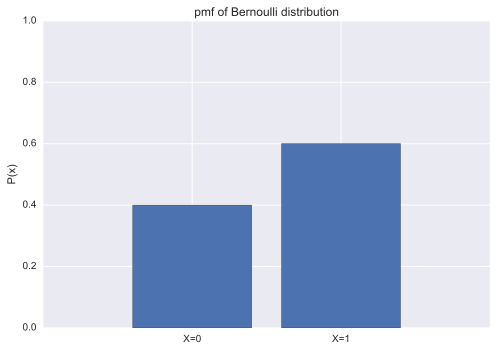

In [2]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["X=0", "X=1"])
plt.ylabel("P(x)")
plt.title("pmf of Bernoulli distribution")
plt.show()

시뮬레이션을 하려면 `rvs` 메서드를 사용한다.

In [9]:
x = rv.rvs(100)
x

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0])

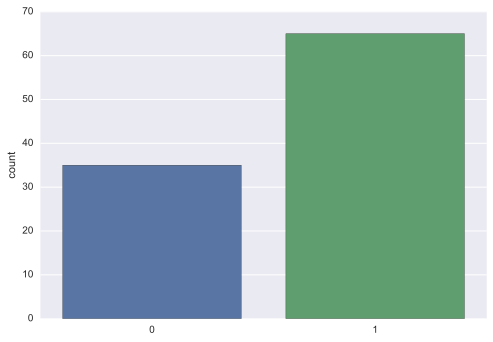

In [12]:
sns.countplot(x)
plt.show()

이론적인 확률 분포와 샘플의 확률 분포를 동시에 나타내려면 다음과 같은 코드를 사용한다.

In [53]:
y = np.bincount(x, minlength=2)/len(x)
df = pd.DataFrame({"theoretic": rv.pmf(xx), "simulation": y}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df

,value,type,ratio
0,0,simulation,0.35
1,0,theoretic,0.40
2,1,simulation,0.65
3,1,theoretic,0.60


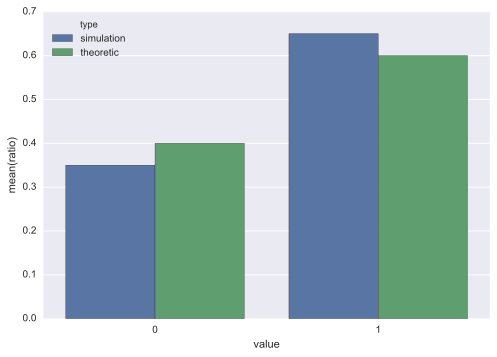

In [55]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

## 베르누이 분포의 모멘트

베르누이 분포의 모멘트는 다음과 같다.

* 기댓값:
$$E[x] = 1 \cdot \theta + 0 \cdot (1 - \theta) =  \theta$$

* 분산: 
$$\text{Var}[x] = (1 - \theta)^2 \cdot \theta + (0 - \theta)^2 \cdot (1 - \theta) = \theta(1-\theta)$$